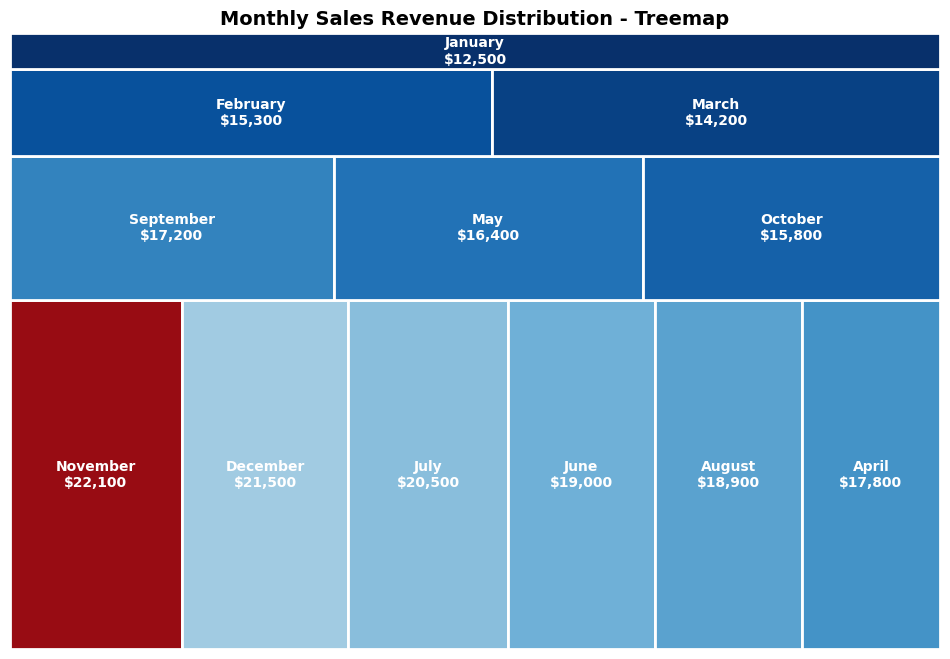

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Monthly sales data
months = [
    "January", "February", "March", "April", "May", "June", "July",
    "August", "September", "October", "November", "December"
]
sales = [12500, 15300, 14200, 17800, 16400, 19000, 20500, 18900, 17200, 15800, 22100, 21500]

# Sort sales and months in descending order so that the layout remains structured
sorted_indices = np.argsort(sales)[::-1]
sorted_months = [months[i] for i in sorted_indices]
sorted_sales = [sales[i] for i in sorted_indices]

# Normalize sales data so it fits within a 1x1 area
total_sales = sum(sales)
sizes = [s / total_sales for s in sorted_sales]

# Squarified Treemap Layout Calculation
def squarified_treemap(sizes, x=0, y=0, width=1, height=1):
    """ Recursively computes treemap layout positions. """
    if not sizes:
        return []
    
    positions = []
    current_x, current_y = x, y
    horizontal_split = width >= height  # Determine whether to split horizontally or vertically
    area_sum = sum(sizes)
    
    # Group sizes into rows or columns until a balance is achieved
    row_sizes = []
    remaining_sizes = sizes[:]
    row_sum = 0

    while remaining_sizes:
        row_sizes.append(remaining_sizes.pop(0))
        row_sum = sum(row_sizes)
        if (row_sum / area_sum) >= 0.5 or not remaining_sizes:
            break

    # Calculate a new width or height for this row/column
    if horizontal_split:
        row_height = height * (row_sum / area_sum)
        for size in row_sizes:
            rect_width = width * (size / row_sum)
            positions.append((current_x, current_y, rect_width, row_height))
            current_x += rect_width
        # For the remaining elements recursively compute
        positions.extend(squarified_treemap(remaining_sizes, x, y + row_height, width, height - row_height))
    else:
        row_width = width * (row_sum / area_sum)
        for size in row_sizes:
            rect_height = height * (size / row_sum)
            positions.append((current_x, current_y, row_width, rect_height))
            current_y += rect_height
        # Recursively compute for remaining elements
        positions.extend(squarified_treemap(remaining_sizes, x + row_width, y, width - row_width, height))

    return positions

# Generate Treemap Positions
treemap_positions = squarified_treemap(sizes)

# Define a color gradient based on the sales value
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sales)))

# Highlight the month with the highest sales (November) with a distinct color
for i, (x, y, w, h) in enumerate(treemap_positions):
    if sorted_months[i] == "November":
        colors[i] = plt.cm.Reds(0.9)

# Plot the Treemap
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Add rectangles and labels
for i, (x, y, w, h) in enumerate(treemap_positions):
    rect = patches.Rectangle((x, y), w, h, facecolor=colors[i], edgecolor="white", linewidth=2)
    ax.add_patch(rect)
    ax.text(
        x + w / 2, y + h / 2,
        f"{sorted_months[i]}\n${sorted_sales[i]:,}",
        ha="center", va="center", fontsize=10, color="white", fontweight="bold"
    )

# Add a Title
plt.title("Monthly Sales Revenue Distribution - Treemap", fontsize=14, fontweight="bold")

# Show the Plot
plt.show()
